I contatenate all the source structure index data piece downloaded from BVID database.

This memos contains

- 1. A simple statistical analysis of the SI indice at X-band

- 2. A proper representation of source sturcture, median of SIs derived at all epochs or the one closest to J2015

- 3. Correlation of SI at different bands

In [1]:
from astropy.table import Table, setdiff, join
from astropy.time import Time
# import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# 1. Statistical properties of SI at X-band

In [2]:
# SI data
si_x_table = Table.read("/Users/Neo/Astronomy/data/bvid/SI_X_20210221.fits")

si_x_table.rename_columns(["source", "date", "flux", "structure_index", "compactness"],
                          ["iers_name", "year", "flux", "si", "compactness"])

# Table of 512 sources
com_sou_list = Table.read("../data/com-sou-list.txt", format="ascii")
com_sou_list2 = Table.read("../data/com-sou-list-DR2.txt", format="ascii")

# Cross-match
si_4_com_sou = join(si_x_table, com_sou_list, keys="iers_name")

# To see how many sources are given a SI measurement
si_4_com_sou_g = si_4_com_sou.group_by("iers_name")

com_sou_with_si = si_4_com_sou_g.groups.keys
print(len(com_sou_with_si), "sources are gvien the SI seasurements.")

383 sources are gvien the SI seasurements.


In [3]:
num_sou_with_si = len(com_sou_with_si)
num_si = np.zeros(num_sou_with_si)
std_si = np.zeros(num_sou_with_si)
si_dif = np.zeros(num_sou_with_si)
epo_dif = np.zeros(num_sou_with_si)
si_val = np.zeros(num_sou_with_si)
epo_si_val = np.zeros(num_sou_with_si)
epo_to_2016 = np.zeros(num_sou_with_si)

for i, group in enumerate(si_4_com_sou_g.groups):
    num_si[i] = len(group)

    if len(group) == 1:
        std_si[i] = 0
    else:
        std_si[i] = np.std(group["si"])

    si_dif[i] = group["si"].max() - group["si"].min()
    epo_dif[i] = group["year"].max() - group["year"].min()

    dif_2016 = np.fabs(group["year"] - 2015)

    ind = dif_2016.argmin()
    si_val[i] = group["si"][ind]
    epo_si_val[i] = group["year"][ind]
    epo_to_2016[i] = dif_2016[ind]

si_sta = Table([
    com_sou_with_si["iers_name"], num_si, std_si, si_dif, epo_dif, si_val,
    epo_to_2016
],
               names=[
                   "iers_name", "nb_si", "si_std", "si_dif", "epo_dif", "si",
                   "epo_2_2016"
               ])

#Sou with only one SI measurements are 84.0


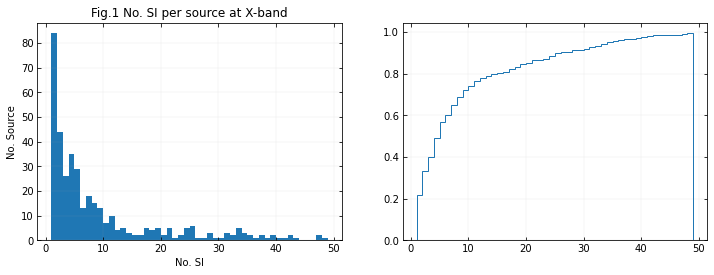

In [4]:
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), ncols=2, sharex=True)

bins = np.arange(1, 50)

cou, _, _ = ax0.hist(si_sta["nb_si"], bins)
ax0.set_xlabel("No. SI")
ax0.set_ylabel("No. Source")
ax0.set_title("Fig.1 No. SI per source at X-band")
ax0.grid(lw=0.1)

num = len(si_sta)
ax1.hist(si_sta["nb_si"], bins, histtype="step", cumulative=True, weights=np.ones(num)/num)
ax1.grid(lw=0.1)

print("#Sou with only one SI measurements are", cou[0])

Fig.2 Standard deviation of SI at X-band


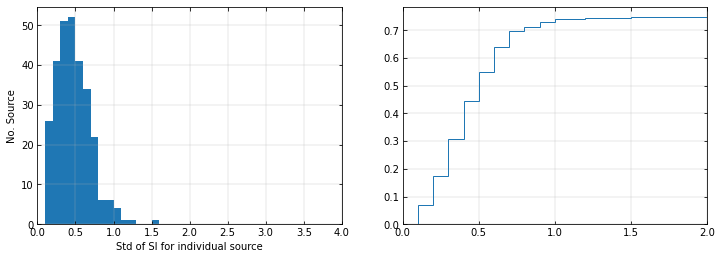

In [5]:
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), ncols=2, sharex=True)

bins = np.arange(0.1, 4, 0.1)
cou_s, _, _ = ax0.hist(si_sta["si_std"], bins)

ax0.set_xlabel("Std of SI for individual source")
ax0.set_ylabel("No. Source")
ax0.set_xlim([0, 2])
ax0.set_xticks(np.arange(0, 4.1, 0.5))
ax0.grid(lw=0.3)

num = len(si_sta["si_std"])
ax1.hist(si_sta["si_std"], bins, histtype="step", cumulative=True, weights=np.ones(num)/num)
ax1.grid(lw=0.3)

print("Fig.2 Standard deviation of SI at X-band")

Fig.3 Maximum absolute difference in SI at X-band


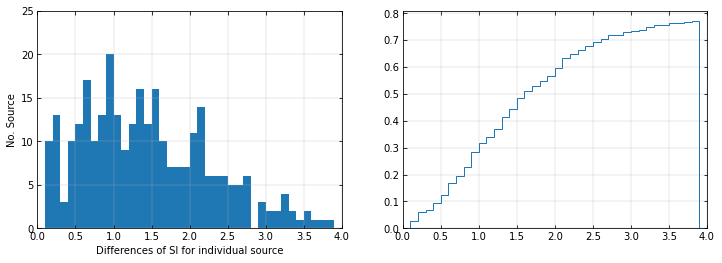

In [6]:
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), ncols=2, sharex=True)

bins = np.arange(0.1, 4, 0.1)
cou_s, _, _ = ax0.hist(si_sta["si_dif"], bins)

ax0.set_xlabel("Differences of SI for individual source")
ax0.set_ylabel("No. Source")
ax0.set_xlim([0, 4])
ax0.set_xticks(np.arange(0, 4.1, 0.5))
ax0.set_ylim([0, 25])
ax0.grid(lw=0.3)

num = len(si_sta["si_dif"])
ax1.hist(si_sta["si_dif"], bins, histtype="step", cumulative=True, weights=np.ones(num)/num)
ax1.grid(lw=0.3)

print("Fig.3 Maximum absolute difference in SI at X-band")

Fig.4 Epoch difference of image


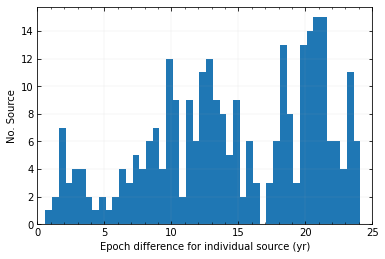

In [7]:
fig, ax = plt.subplots()

bins = np.arange(0.1, 25, 0.5)
cou_s, _, _ = ax.hist(si_sta["epo_dif"], bins)

ax.set_xlabel("Epoch difference for individual source (yr)")
ax.set_ylabel("No. Source")

ax.set_xlim([0, 25])
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.grid(lw=0.1)

print("Fig.4 Epoch difference of image")

Fig.5 Epoch difference to J2016


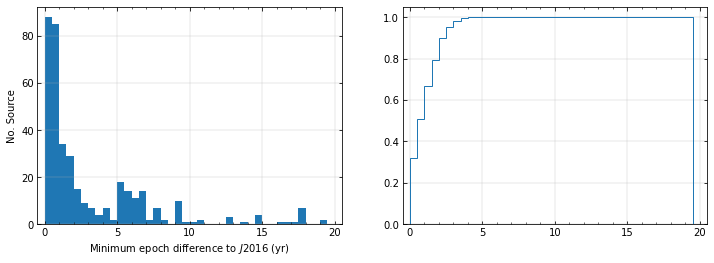

In [8]:
fig, (ax0, ax1) = plt.subplots(figsize=(12, 4), ncols=2, sharex=True)

bins = np.arange(0, 20, 0.5)
cou_s, _, _ = ax0.hist(si_sta["epo_2_2015"], bins)

ax0.set_xlabel("Minimum epoch difference to $J2016$ (yr)")
ax0.set_ylabel("No. Source")
ax0.set_xlim([-0.5, 20.5])
ax0.set_xticks(np.arange(0, 20.1, 5))
ax0.xaxis.set_minor_locator(MultipleLocator(1))
ax0.grid(lw=0.3)

num = len(si_sta["si_dif"])
ax1.hist(si_sta["si_dif"], bins, histtype="step", cumulative=True, weights=np.ones(num)/num)
ax1.grid(lw=0.3)

print("Fig.5 Epoch difference to J2015")

For most sources, the number of SI measurements is less than 5, as shown in Fig. 1.

Figure 2 tells us that the standard deviation of SIs for individual sources is less than 1 for most cases, but the maximum of SI difference could be as large as 3-4 (Fig. 3), indicating possible violate changes in source morphology.

Since the image is just a snapshot of the source, the epoch is of great importance.
Considering the epoch, I find that even for individual source, the gap between the first and the last image could be as long as 20 yr (Fig.4).
But if we choose the image made at the median epoch, the median epoch to the J2015.0 is shorter than 1-yr for over 150 sources.

# 2 Use the extracted SI data

In [10]:
si_x_tab = Table.read("../data/si_x.fits")

mask = si_x_tab["si_c15"] != 0
si_x_tab1 = si_x_tab[mask]

In [11]:
# Source with SI in BVID
com_sou_si = join(com_sou_list, si_x_tab1, keys="iers_name")

com_sou_si.write("../data/si_from_bvid.fits", overwrite=True)

In [12]:
# Source without SI in BVID
miss_sou_list = setdiff(com_sou_list, com_sou_si, keys="iers_name")
miss_sou_list.write("../data/miss_sou_in_bvid.txt",
                    format="ascii", formats={"iers_name": "%s"},
                    overwrite=True)

In [13]:
# Also about how many new sources when using EDR3 than DR2
miss_sou_list2 = setdiff(com_sou_list2, si_x_tab1, keys="iers_name")
miss_sou_list2.write("../data/miss_sou_in_bvid-DR2.txt",
                    format="ascii", formats={"iers_name": "%s"},
                    overwrite=True)

# 3 Use the `Astrogeo` database

Then I run the script `get_astrogeo_image.py` to get the images availabel in Astrogeo dababase for those sources that do not have a SI measurement in BVID.

In [14]:
class_tab = Table.read("../logs/sou-class.txt", format="ascii")

class_tab_g = class_tab.group_by("class")

comments = ["use SI from BVID directly",
            "could calculate the SI using images from Astrogeo",
            "might use SI from BVID",
            "use SI from BVID directly",
            "should calculate the SI using images from Astrogeo",
            "should calculate the SI using images from Astrogeo",
            "No idea"]

In [15]:
for i in range(len(class_tab_g.groups)):
    print("{:2s}  {:3d}  {}".format(class_tab_g.groups[i]["class"][0],
                                   len(class_tab_g.groups[i]),
                                   comments[i]))

A   381  use SI from BVID directly
B1    1  could calculate the SI using images from Astrogeo
B2    1  might use SI from BVID
C1   29  use SI from BVID directly
C2   72  should calculate the SI using images from Astrogeo
C3   28  should calculate the SI using images from Astrogeo


In short,

| Condition | No. Source |
| --- | --- |
| total |                   512 |
| SI in BVID (all epoch)  | 381 |
| SI Missing  | 131 |